# Анализ деятельности сети фитнес-клубов (ДЗ в рамках курса Scypro "Аналитик данных")

# 🏃‍♂️🤸‍♂️🏋️‍♀️ 
Ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на следующий год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

В заданиях ставляй свои комментарии о том, какие закономерности видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

# сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь?**



In [3]:
workouts.head()

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530


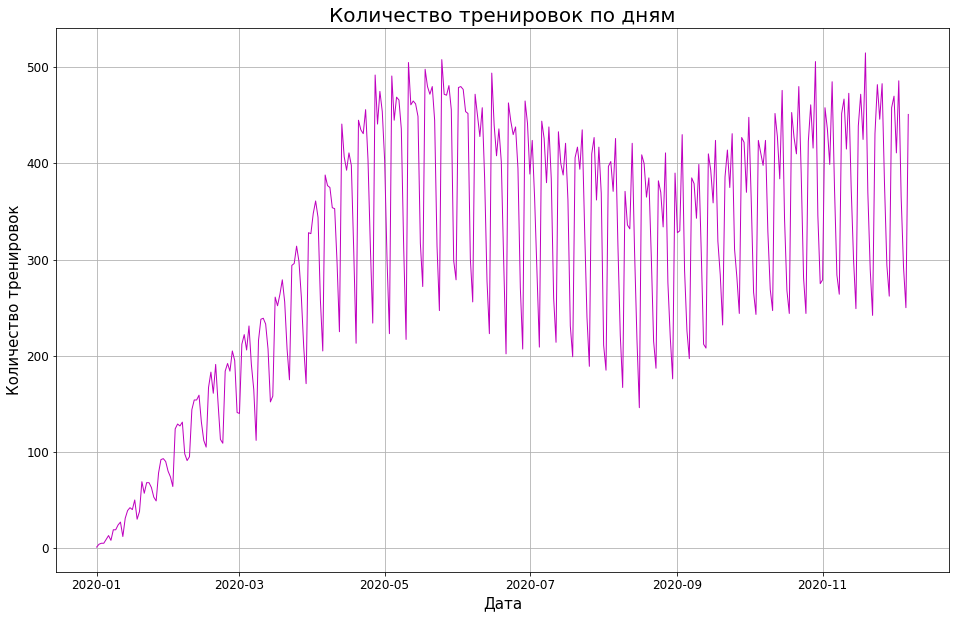

In [4]:
#группируем по дням 
trainings_by_day = workouts.resample('D', on = 'start_at')['workout_id'].count()

#строим линейный график
plt.figure(figsize =(16,10))
plt.grid()
plt.plot(trainings_by_day.iloc[:-1], c = 'm', lw = 1 )
plt.title('Количество тренировок по дням', fontsize = 20)
plt.xlabel('Дата', fontsize = 15)
plt.ylabel('Количество тренировок', fontsize = 15)
plt.tick_params(axis='both', labelsize=12)
plt.show()

# Вывод:
В целом посещаемость тренировок растёт. Есть падение количества тренировок в летние месяцы. Кроме того, прослеживается недельная сезонность: к концу недели посещаемость снижается.

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. Поэтому по каждому департаменту нам важно узнать, какую нагрузку имеют тренера (в количестве тренировок) и сколько тренеров имеют ту или иную нагрузку. 

**Построй гистограмму распределения, которая покажет, сколько тренеров провели n число тренировок в ноябре. При подсчете постоянных тренеров рассматриваем только тех, которые уже работали в нашей компании до 1 ноября. Сделай отдельный график по каждому департаменту (всего их 7).**



In [5]:
# выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

# множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [6]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [7]:
# кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем series в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [8]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

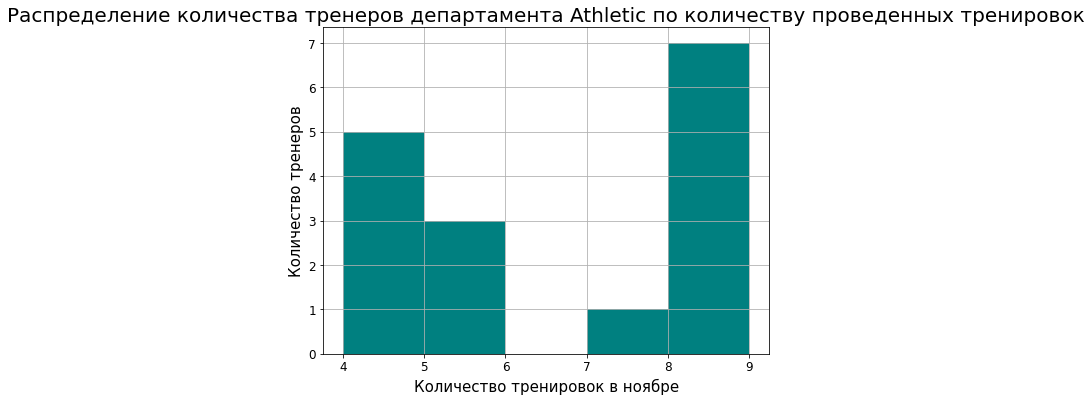

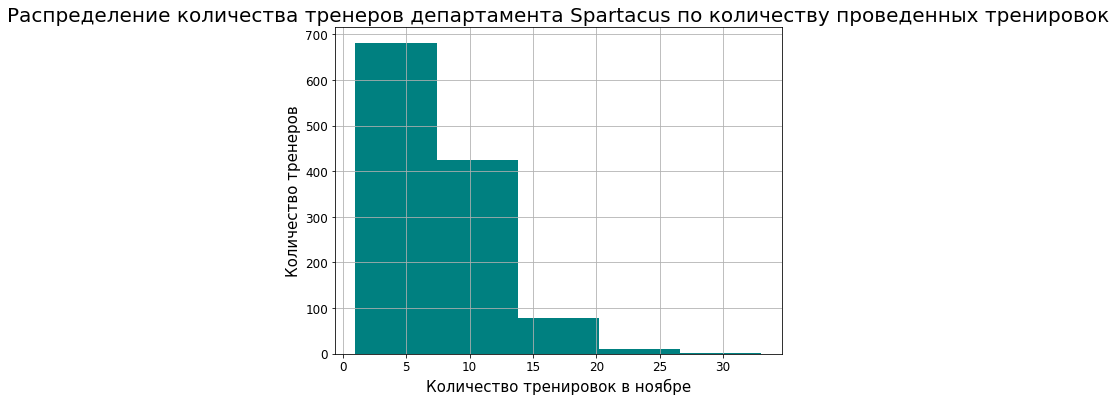

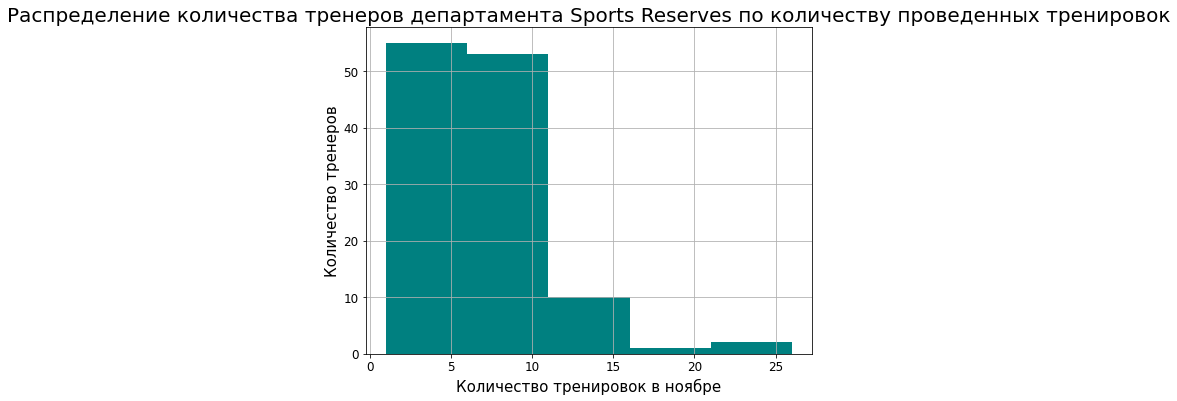

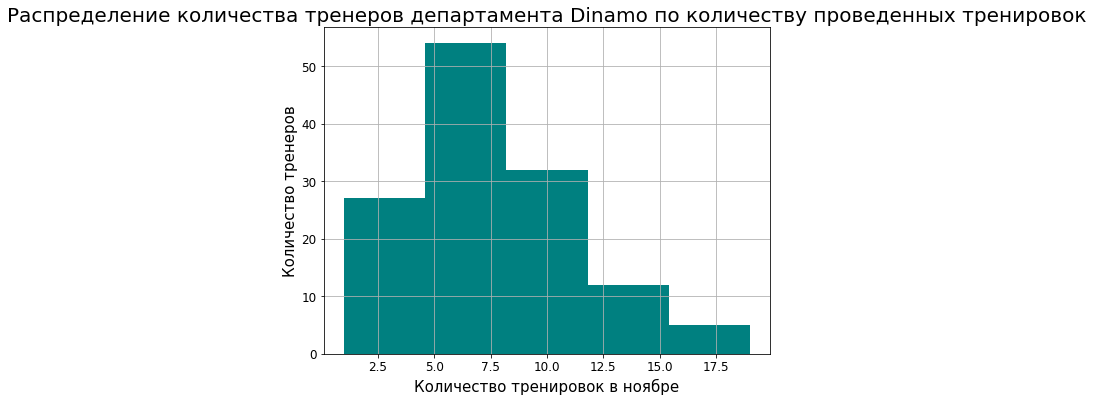

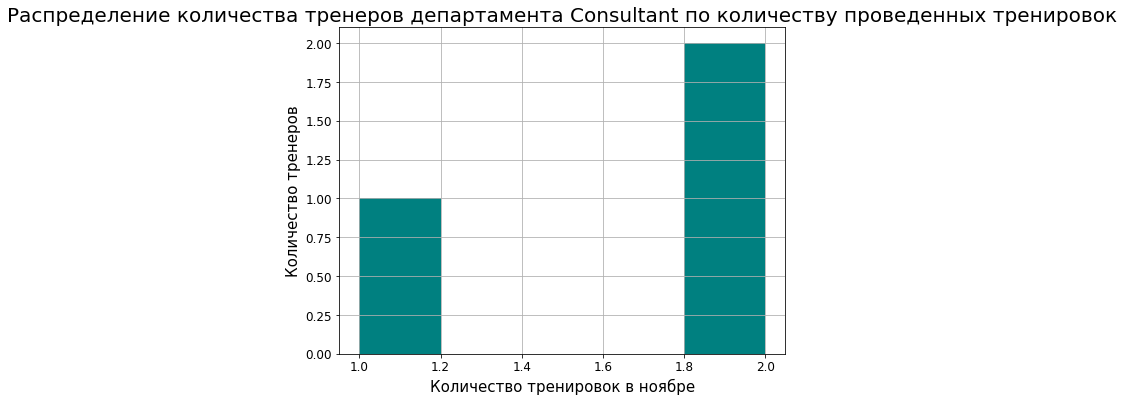

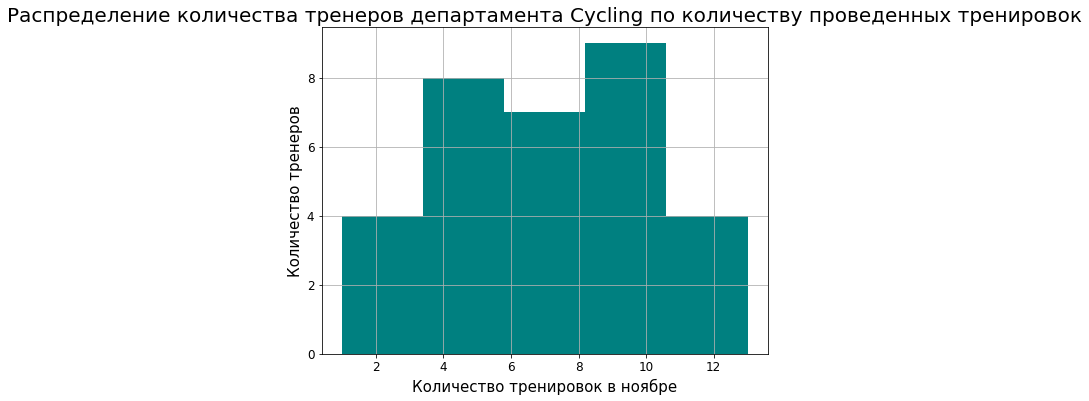

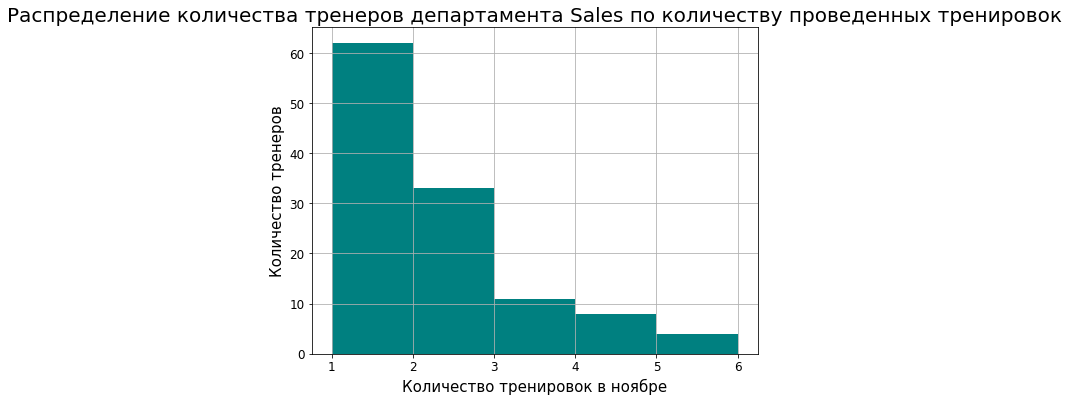

In [9]:
#построим гистограммы распределения тренировок для каждого департамента
for department in departments:
    data_plot = workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == department]
    plt.figure(figsize =(8,6))
    plt.grid()
    plt.hist(data_plot['workouts'], color = 'teal', bins = 5 )
    plt.title(f'Распределение количества тренеров департамента {department} по количеству проведенных тренировок', fontsize = 20)
    plt.xlabel('Количество тренировок в ноябре', fontsize = 15)
    plt.ylabel('Количество тренеров', fontsize = 15)
    plt.tick_params(axis='both', labelsize=12)
    plt.show()

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренировок по сравнению с остальными и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**



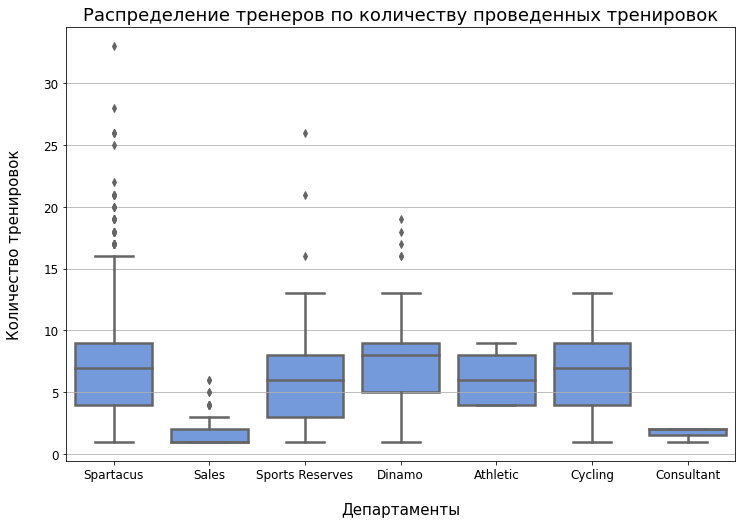

In [10]:
plt.figure(figsize=(12, 8))  
plt.title('Распределение тренеров по количеству проведенных тренировок', fontsize = 18) 
plt.grid()

sns.boxplot(x = 'trainer_department',
            y = 'workouts',
            data = workouts_by_trainer,
            color = 'cornflowerblue',
            linewidth=2.5)
plt.xlabel('\nДепартаменты', fontsize = 15) 
plt.ylabel('Количество тренировок\n', fontsize = 15) 
plt.tick_params(axis='both', labelsize=12)
plt.show()

# Вывод:
Исходя из графика можно сделать вывод, что в департаменте Spartacus больше всего случаев повышенной нагрузки на тренеров. 

Среднее количество тренировок в департаментах Spartacus, Sport Reserves, Dinamo, Athletic, Cycling находится в примерном диапазоне от 6 до 8. 

Самое высокое среднее количество тренировок (около 8) - в департаменте Dinamo, в данном департаменте также есть тренеры, проводящие свыше 15 занятий. 

В среднем по 6 тренировок в департаментax Sport Reserves и Athletic, примечательно, что Sport Reserves нагрузка на тренеров явно распределена неравномерно и есть тренеры, проводящие свыше 15 тренировок, а есть - ниже 5. 

Особое внимание привлекает нагрузка в департаментах  Sales и Consultant - основное количество тренировок составляет 1-2, возможно потому что данные департаменты не ориентированы на проведение тренировок. 

Таким образом, необходимо перераспределить нагрузку на тренеров среди департаментов Spartacus, Sport Reserves, Dinamo, Athletic, Cycling.

## Задание 4


Логично, что дешевые тренировки пропускают чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании. Оставь комментарий по каждому графику – видишь ли ты какие-то явные зависимости в данных?**


In [13]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


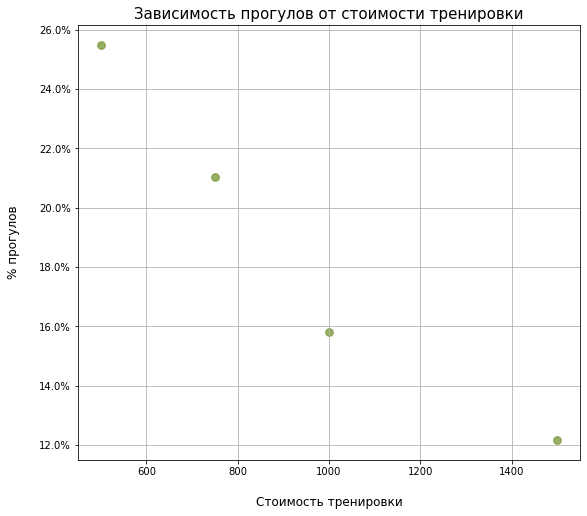

In [17]:
import matplotlib.ticker as mtick

cost_data_agg = cost_age_data.groupby('cost')['status'].mean().reset_index() #считаем долю прогулов по цене 

fig = plt.figure(1, (9,8))
ax = fig.add_subplot(1,1,1) #указываем, что будет один график

plt.title('Зависимость прогулов от стоимости тренировки', fontsize = 15) 
plt.xlabel('\nСтоимость тренировки', fontsize = 12) 
plt.ylabel('% прогулов\n', fontsize = 12) 
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))#задаем процентный формат для оси y
plt.grid() 

# строим скаттерплот, который покажет корреляцию прогулов к цене
plt.scatter(
        cost_data_agg['cost'], 
        cost_data_agg['status'], 
        color = 'olivedrab',
        s=60,
        alpha = 0.7 
)

plt.show() 

# Вывод:
Прослеживается некая нелинейная обратная зависимость доли прогулов от стоимости тренировки: тренировки с более дешевой ценой (600) прогуливают чаще. При этом доля прогулов тренировок по цене 1000 и 1500 отличается незначительно.

**Построй скаттерплот, который покажет корреляцию прогулов к возрасту**


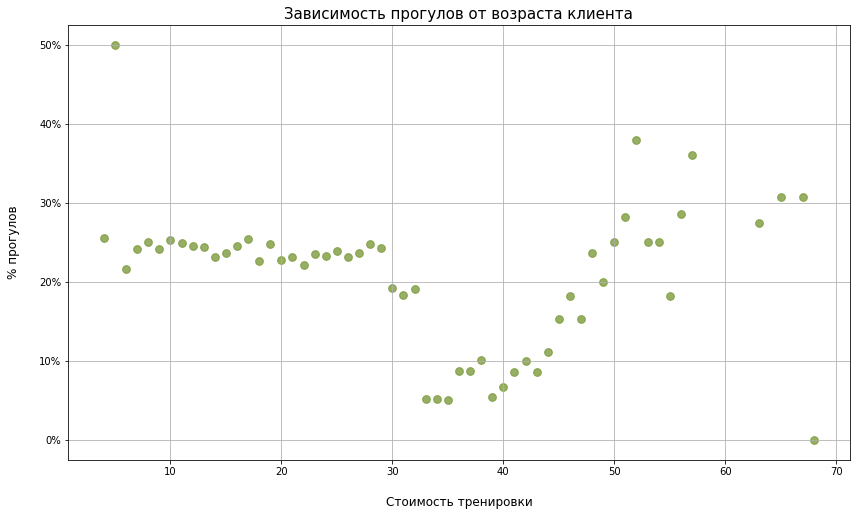

In [16]:
age_data_agg = cost_age_data.groupby('age')['status'].mean().reset_index() #считаем долю прогулов по возрасту  

fig = plt.figure(1, (14,8))
ax = fig.add_subplot(1,1,1)

plt.title('Зависимость прогулов от возраста клиента', fontsize = 15) 
plt.xlabel('\nСтоимость тренировки', fontsize = 12) 
plt.ylabel('% прогулов\n', fontsize = 12) 
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))#задаем процентный формат для оси y
plt.grid() 

# строим скаттерплот, который покажет корреляцию прогулов к возрасту
plt.scatter(
        age_data_agg['age'], 
        age_data_agg['status'], 
        color = 'olivedrab',
        s=60,
        alpha = 0.7 
)

plt.show() 

# Вывод:
Из графика можно увидеть некую прямую закономерность доли прогулов от возраста после 30: в диапазоне от 30 до 50 лет доля прогулов растет пропорционально возрасту. В диапазоне от 10 до 30 доля прогулов находится примерно на одном уровне.

**Построй скаттерплот, который покажет корреляцию прогулов и к возрасту, и к цене одновременно**


In [18]:
set(cost_age_data_agg['cost'])


{500, 750, 1000, 1500}

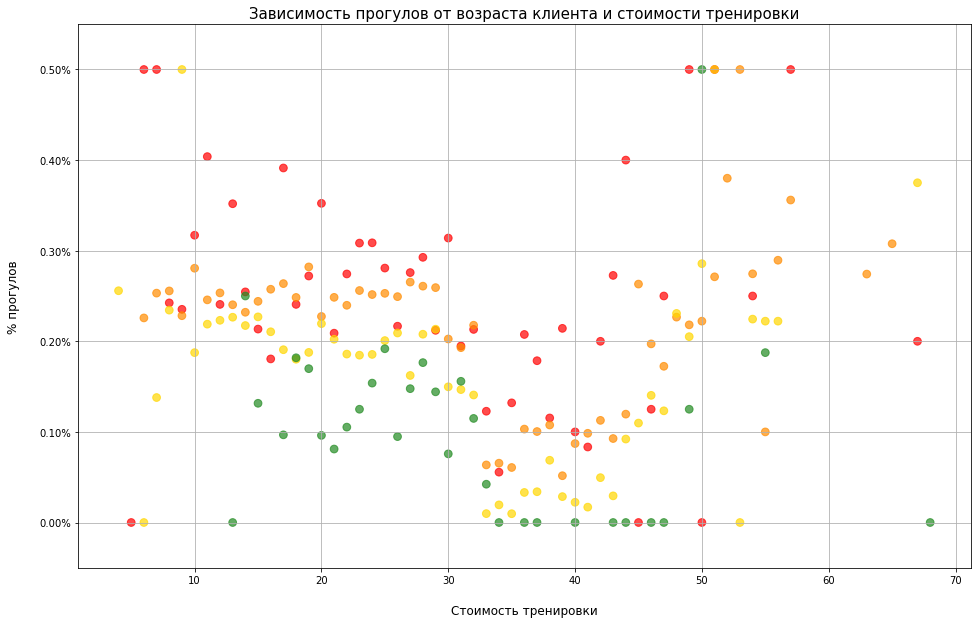

In [19]:
#для каждой цены предусматриваем цвет
price_color = {500: 'r', 750: 'darkorange', 1000:'gold', 1500: 'forestgreen' }


fig = plt.figure(1, (16,10))
ax = fig.add_subplot(1,1,1)

plt.ylim(-0.05, 0.55)


plt.title('Зависимость прогулов от возраста клиента и стоимости тренировки', fontsize = 15) 
plt.xlabel('\nСтоимость тренировки', fontsize = 12) 
plt.ylabel('% прогулов\n', fontsize = 12) 
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))#задаем процентный формат для оси y
plt.grid() 

# строим скаттерплот, который покажет корреляцию прогулов к цене(по цвету) и возрасту
plt.scatter(
        cost_age_data_agg['age'], 
        cost_age_data_agg['status'], 
        color = cost_age_data_agg['cost'].map(price_color),
        s=60,
        alpha = 0.7 
)

plt.show() 

# Вывод:
Исходя из графика можно заметить, что среди прогуливающих до 30 лет пропущенных тренировок с высокой ценой больше, чем среди прогуливающих от 30 до 50. Возможно, потому что с возрастом повышается бережливость по отношению к деньгам.

## Задание 5

**Сделай heatmаp для кейса из задания 4.** 


In [20]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [21]:
# кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg.head()

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573


In [22]:
#создаем сводную таблицу
heat_truancy = cost_age_data_agg.pivot(index="age_bin", 
                                        columns="cost", 
                                        values="status")
heat_truancy

cost,500,750,1000,1500
age_bin,,,,
0-20,0.286578,0.249445,0.206955,0.133663
21-25,0.283505,0.250124,0.190771,0.158784
26-30,0.255597,0.249445,0.191932,0.124706
31-35,0.165217,0.128114,0.069580,0.100313
36-40,0.175573,0.097115,0.035191,0.000000
41-45,0.191489,0.109646,0.067100,0.000000
46-50,0.285714,0.198748,0.171171,0.097561
50+,0.307692,0.296992,0.239130,0.176471


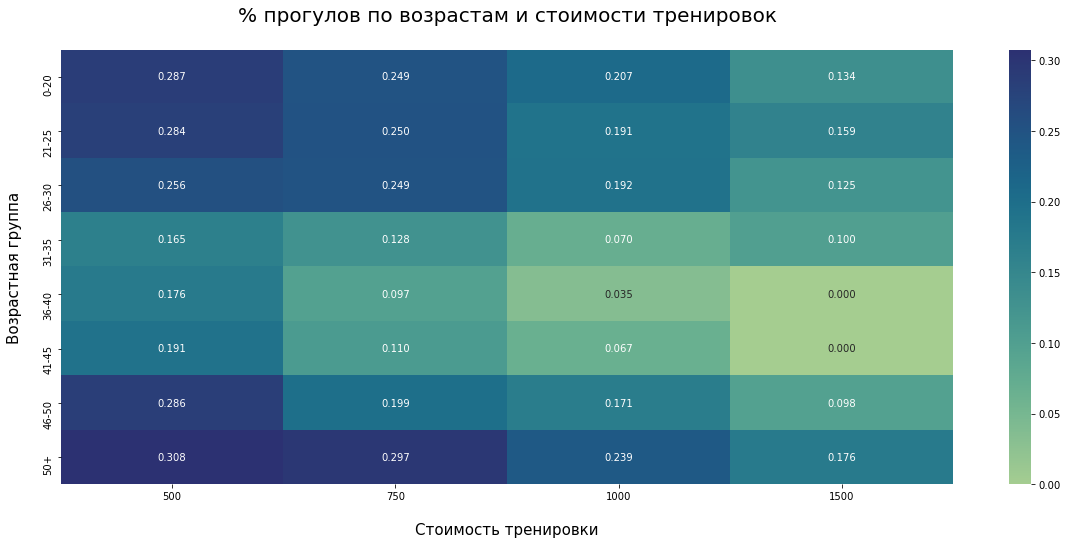

In [23]:
#строим тепловую карту
plt.figure(figsize=(20,8))
sns.heatmap(heat_truancy, 
            annot=True, 
            cmap="crest", 
            fmt='.3f')
plt.title("% прогулов по возрастам и стоимости тренировок\n", fontsize = 20)
plt.ylabel("Возрастная группа\n", fontsize = 15)
plt.xlabel("\nСтоимость тренировки", fontsize = 15)
plt.show()

# Вывод:
Исходя из тепловой карты можно еще раз убедиться, что более дешевые тренировки клиенты прогуливают охотнее. При этом в возрасте 50+ доля прогуливающих выше, чем в остальных возрастных группах. Меньше всего прогуливают в возрастных группах 31-35 и 36-40 лет.

## EXTRA

Если остались силы, сделай дополнительное задание по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти информацию самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**


In [24]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
2020-12-08      3
Freq: D, Name: workout_id, Length: 343, dtype: int64

In [25]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,4,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,5,5,Saturday
4,2020-01-05,9,6,Sunday
...,...,...,...,...
338,2020-12-04,365,4,Friday
339,2020-12-05,292,5,Saturday
340,2020-12-06,250,6,Sunday
341,2020-12-07,451,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [26]:
trainings_by_day_frame['week_day_num'] += 1 

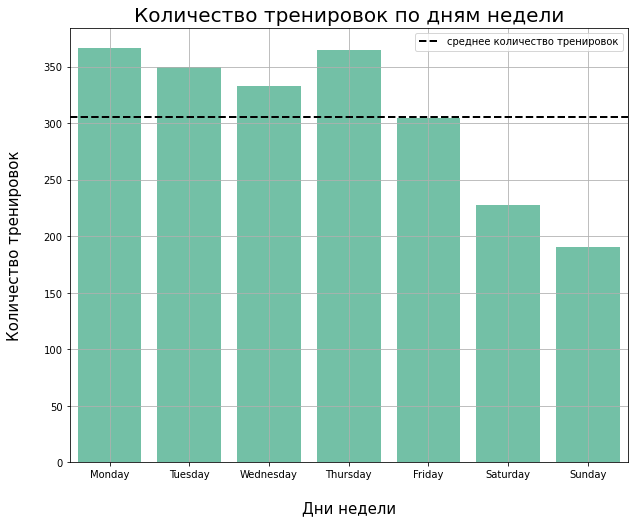

In [28]:
import calendar, locale #импортируем модуль, чтобы взять список названий дней недели

trainings_by_day_mean = trainings_by_day_frame.groupby('week_day_num')['workouts'].mean().reset_index()

#построим столбчатую диаграмму
plt.figure(1,(10,8))
sns.barplot(x = trainings_by_day_mean.week_day_num, 
            y = trainings_by_day_mean.workouts, 
            data = trainings_by_day_mean,
               color="mediumaquamarine")

#добавим горизонтальную линию среднего количества тренировок
plt.axhline(trainings_by_day_frame['workouts'].mean(), color='k', linestyle='--', linewidth=2, label = 'среднее количество тренировок')
plt.title('Количество тренировок по дням недели', fontsize = 20)
plt.grid()
plt.xlabel('\nДни недели', fontsize = 15)
plt.ylabel('Количество тренировок\n', fontsize = 15)
#переименуем подписи делений по оси x
plt.xticks(trainings_by_day_mean.index, list(calendar.day_name))
plt.legend()
plt.show()

# Вывод:
Наибольшее количество тренировок приходится на понедельник и четверг, а вот к выходным активность заметно снижается.